### Objective: 
- Data Cleaning
- Exploratory Data Analysis(EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Understanding Data

In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Missing Values

In [9]:
missing_value = df.isnull().sum()
missing_percentage = (((df.isnull().sum())/len(df))*100)
x = pd.DataFrame({'Missing Values':missing_value,'Missing Percentage':missing_percentage})

In [10]:
print(x)

                Missing Values  Missing Percentage
App                          0            0.000000
Category                     0            0.000000
Rating                    1474           13.596532
Reviews                      0            0.000000
Size                         0            0.000000
Installs                     0            0.000000
Type                         1            0.009224
Price                        0            0.000000
Content Rating               1            0.009224
Genres                       0            0.000000
Last Updated                 0            0.000000
Current Ver                  8            0.073794
Android Ver                  3            0.027673


<AxesSubplot:xlabel='Rating', ylabel='Count'>

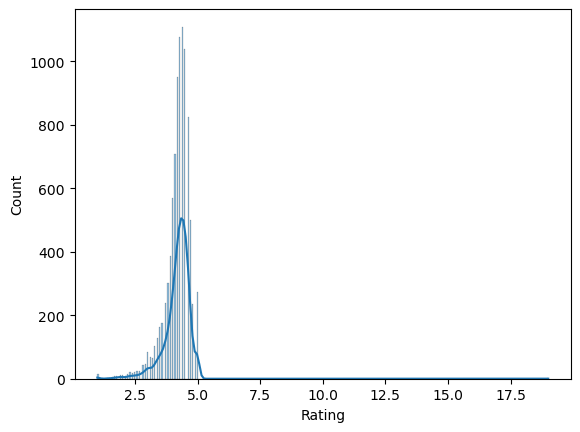

In [11]:
sns.histplot(df['Rating'],kde=True)

In [12]:
df = df.dropna(subset=['Rating'])

In [13]:
df.shape

(9367, 13)

In [14]:
df.Type.value_counts()

Free    8719
Paid     647
0          1
Name: Type, dtype: int64

In [19]:
df[df['Type']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
df['Type'] = df['Type'].replace('0',pd.NA)

In [23]:
df['Type'].isnull().sum()

1

In [24]:
df[df['Type'].isnull()][["App"]]

,App
10472,Life Made WI-Fi Touchscreen Photo Frame


- Based on available information, the "Life Made WI-Fi Touchscreen Photo Frame" app is categorized as Free.

In [25]:
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame','Type']='Free'

In [28]:
df['Type'].isnull().sum()

0

In [30]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Free,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [31]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [32]:
df['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [33]:
df['Content Rating'].fillna(df['Content Rating'].mode()[0],inplace=True)

In [35]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

In [40]:
df['Current Ver'].fillna('Unknown',inplace=True)

In [41]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Free,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,NaN


In [42]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up'], dtype=object)

In [45]:
df['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

<AxesSubplot:xlabel='Android Ver', ylabel='Count'>

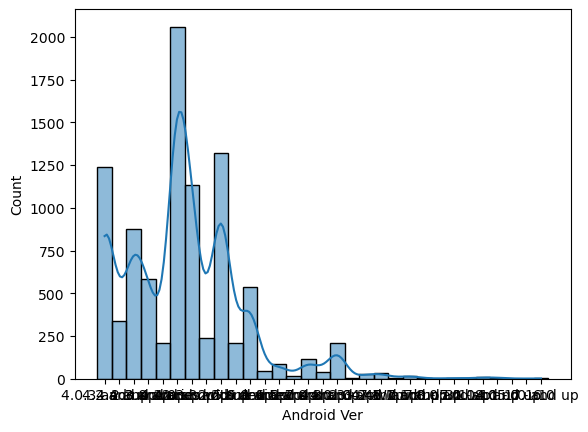

In [44]:
sns.histplot(df['Android Ver'],kde=True)

#### Realisticaly Filling Missing Values

In [52]:
df.loc[df['App'] == '[substratum] Vacuum: P', 'Android Ver'] = '8.1 and up'

In [55]:
df.loc[df['App'] == 'Pi Dark [substratum]', 'Android Ver'] = '8.1 and up'

In [56]:
df.loc[df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame', 'Android Ver'] = '4.0 and up'

In [59]:
df['Android Ver'].isnull().sum()

0

In [61]:
df.drop(columns=['Android Version'],inplace=True)

In [62]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [63]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Duplicates

In [64]:
df.duplicated().sum()

474

In [67]:
df[df.duplicated(keep=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [66]:
df.value_counts()

App                                                 Category          Rating  Reviews  Size                Installs      Type  Price  Content Rating  Genres                       Last Updated        Current Ver         Android Ver       
eBay: Buy & Sell this Summer - Discover Deals Now!  SHOPPING          4.4     2788923  Varies with device  100,000,000+  Free  0      Teen            Shopping                     July 30, 2018       Varies with device  Varies with device    4
Google Keep                                         PRODUCTIVITY      4.4     691474   Varies with device  100,000,000+  Free  0      Everyone        Productivity                 August 6, 2018      Varies with device  Varies with device    4
Nick                                                ENTERTAINMENT     4.2     123279   25M                 10,000,000+   Free  0      Everyone 10+    Entertainment;Music & Video  January 24, 2018    2.0.8               4.4 and up            4
CBS Sports App - Scores, News, St

In [68]:
df.drop_duplicates(keep='first',inplace=True)

In [70]:
df.duplicated().sum()

0

### Outliers

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

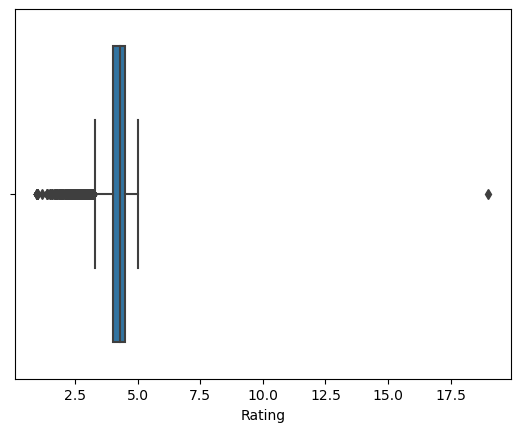

In [71]:
sns.boxplot(df['Rating'])

- Ratings may vary due to many factors so these will not be considered as outliers but it can't be greater than 5.

In [72]:
df[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Free,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.0 and up


In [73]:
df = df[df['Rating']<=5]

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

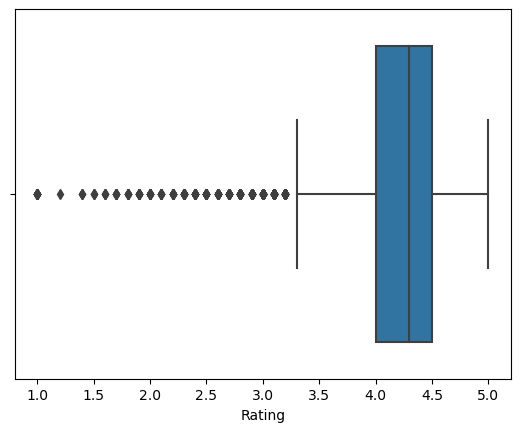

In [74]:
sns.boxplot(df['Rating'])

In [76]:
df[df['Rating']<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


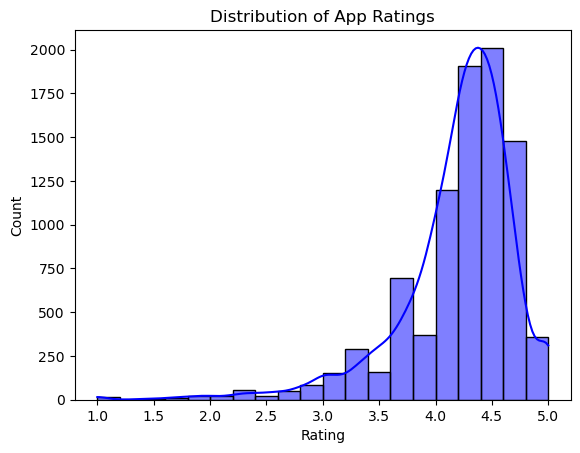

In [83]:
sns.histplot(df['Rating'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

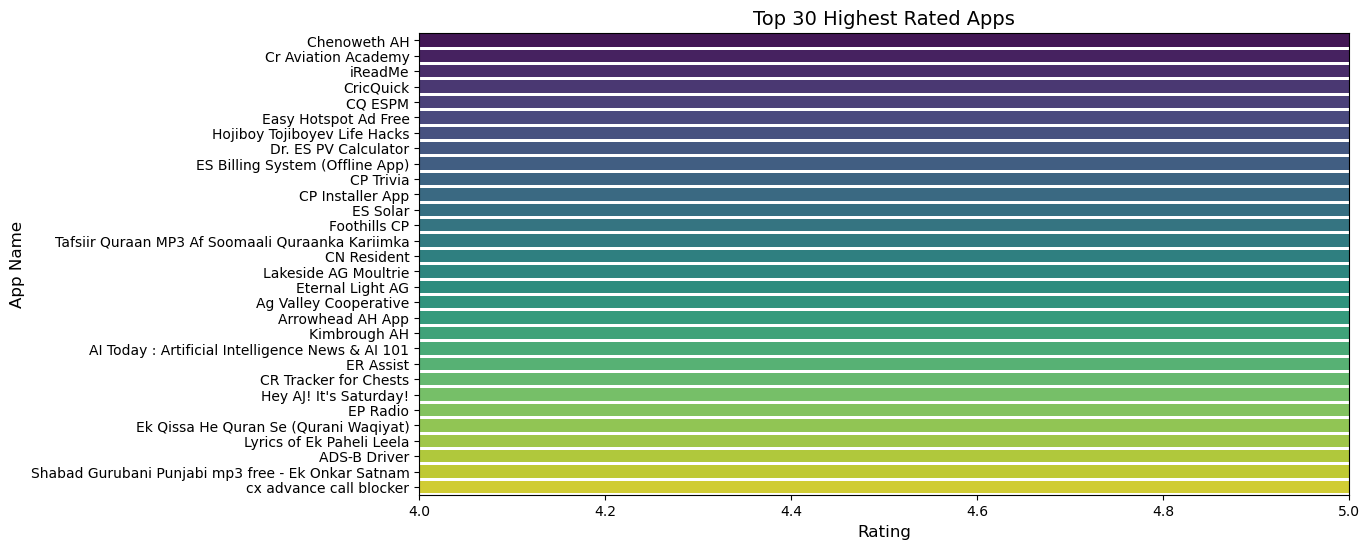

In [82]:
# Get top 30 rated apps
top_rated_apps = df[['App', 'Rating']].dropna().sort_values(by='Rating', ascending=False).head(30)

# Set figure size
plt.figure(figsize=(12, 6))

# Create barplot
sns.barplot(x='Rating', y='App', data=top_rated_apps, palette='viridis')

# Add title and labels
plt.title('Top 30 Highest Rated Apps', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('App Name', fontsize=12)
plt.xlim(4, 5)  # Assuming ratings are between 1-5

# Show plot
plt.show()

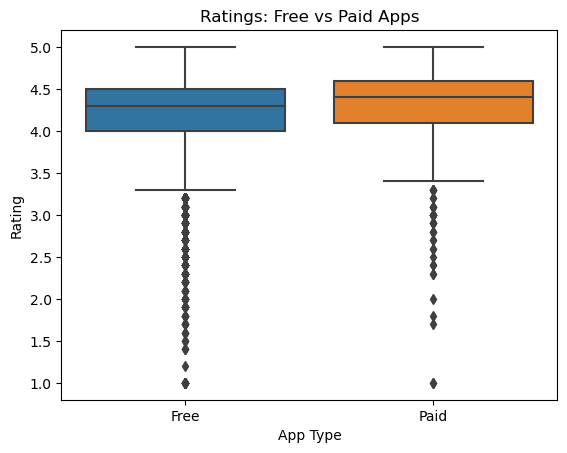

In [84]:
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('Ratings: Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.show()

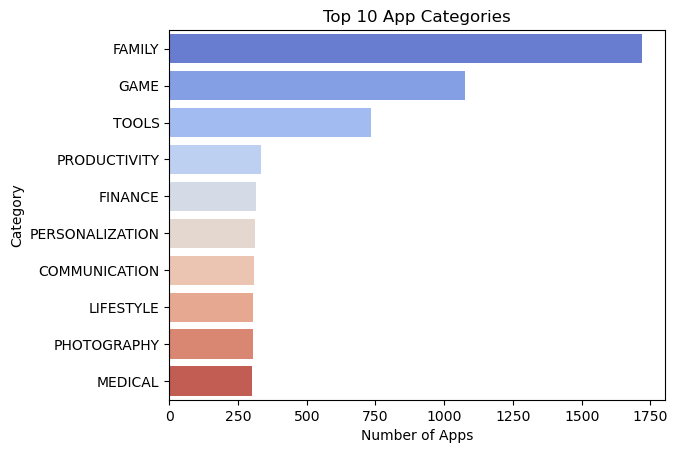

In [85]:
top_categories = df['Category'].value_counts().head(10)
sns.barplot(y=top_categories.index, x=top_categories.values, palette='coolwarm')
plt.title('Top 10 App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_41792\974461215.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').astype(float)


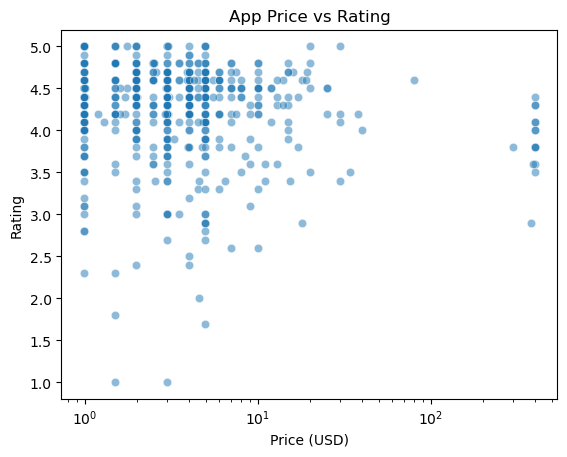

In [86]:
df['Price'] = df['Price'].str.replace('$', '').astype(float)
sns.scatterplot(x='Price', y='Rating', data=df, alpha=0.5)
plt.xscale('log')  # Log scale because some apps are very expensive
plt.title('App Price vs Rating')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.show()

### Summary: Google Play Store Apps Data Preprocessing & Analysis
#### Step 1: Data Preprocessing
1.**Handling Missing Values**
- Identify missing values in each column.
- If an app has a missing value in Type, Category, or Android Version, we search and replace it based on real-world data or similar apps.

2.**Handling Duplicates**

- Some apps may have duplicate entries due to data collection errors.
- We remove duplicates while keeping the first occurrence.

3.**Handling Outliers**

- Ratings range from 1 to 5, but some may appear as outliers.
- We analyze whether outliers should be removed based on their impact on analysis.

#### Step 2: Exploratory Data Analysis (EDA)
1.**Rating Distribution**

- Most apps have high ratings (4.0+), but some have lower ratings.
- Understanding rating trends helps identify user preferences.

2.**Free vs Paid Apps**

- Do paid apps have higher ratings than free apps?
- Comparing ratings between free and paid apps can provide insights into app quality.

3.**Most Popular App Categories**

- Checking the most common categories helps understand market trends.

4.**Top 10 Rated Apps**

- Identifying the highest-rated apps gives insights into what users prefer.

#### Final Thoughts
- Data preprocessing ensures accuracy in analysis.
- EDA helps uncover patterns and trends in app ratings and popularity.

